In [4]:
import pandas as pd
import numpy as np
import json

In [8]:
!wget https://raw.githubusercontent.com/tranbamanh229289/Project-1-Search-Engine_Base/master/Data/list_dict.json
!wget https://raw.githubusercontent.com/tranbamanh229289/Project-1-Search-Engine_Base/master/Data/list_doc_id.json

--2021-11-19 13:16:37--  https://raw.githubusercontent.com/tranbamanh229289/Project-1-Search-Engine_Base/master/Data/list_dict.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1074593 (1.0M) [text/plain]
Saving to: ‘list_dict.json’

list_dict.json      100%[===================>]   1.02M  --.-KB/s    in 0.04s   

2021-11-19 13:16:37 (29.1 MB/s) - ‘list_dict.json’ saved [1074593/1074593]

--2021-11-19 13:16:37--  https://raw.githubusercontent.com/tranbamanh229289/Project-1-Search-Engine_Base/master/Data/list_doc_id.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request se

In [15]:
with open('/content/list_doc_id.json') as f1:
    list_doc_id = json.load(f1)
with open('/content/list_dict.json') as f2:
    list_dict = json.load(f2)

In [18]:
print(list_dict)

[['$1', 24, 0], ['$10', 19, 1], ['$10-a-month', 1, 2], ['$100', 15, 3], ['$1000', 8, 4], ['$10000', 6, 5], ['$100000', 5, 6], ['$1003', 2, 7], ['$101600', 1, 8], ['$101994', 1, 9], ['$102', 3, 10], ['$102300', 1, 11], ['$1025', 1, 12], ['$103', 1, 13], ['$10450', 1, 14], ['$105', 4, 15], ['$1050', 1, 16], ['$106', 4, 17], ['$106000', 1, 18], ['$107', 1, 19], ['$1070', 1, 20], ['$109295', 1, 21], ['$11', 16, 22], ['$110', 2, 23], ['$110000', 1, 24], ['$11005', 1, 25], ['$11049', 2, 26], ['$111', 1, 27], ['$11124', 1, 28], ['$112', 1, 29], ['$11299', 1, 30], ['$11379', 1, 31], ['$114', 3, 32], ['$1140', 1, 33], ['$115', 2, 34], ['$1150', 1, 35], ['$115000', 2, 36], ['$1166', 1, 37], ['$117', 1, 38], ['$1175', 1, 39], ['$1197', 1, 40], ['$12', 17, 41], ['$120', 2, 42], ['$1200', 2, 43], ['$12000', 1, 44], ['$120000', 2, 45], ['$12180', 1, 46], ['$122', 1, 47], ['$125', 3, 48], ['$12500', 1, 49], ['$126', 1, 50], ['$1261', 1, 51], ['$126120', 1, 52], ['$127', 2, 53], ['$128', 1, 54], ['$12

In [19]:
print(list_doc_id)

[[14, 48, 92, 112, 217, 269, 284, 468, 508, 516, 517, 582, 590, 642, 684, 740, 763, 788, 789, 854, 881, 930, 946, 953], [111, 205, 261, 269, 294, 387, 508, 526, 555, 593, 734, 764, 823, 878, 909, 925, 930, 953, 996], [206], [35, 173, 216, 294, 295, 302, 506, 507, 516, 517, 777, 823, 909, 958, 961], [12, 80, 217, 242, 328, 518, 609, 957], [165, 169, 205, 258, 264, 944], [157, 267, 292, 399, 879], [205, 264], [822], [790], [396, 420, 610], [989], [242], [801], [356], [641, 855, 919, 998], [42], [471, 620, 661, 937], [399], [214], [883], [677], [156, 197, 214, 216, 237, 272, 322, 401, 514, 788, 821, 836, 854, 909, 915, 919], [31, 677], [516], [200], [87, 200], [314], [87], [497], [801], [801], [75, 684, 730], [57], [22, 740], [613], [379, 818], [570], [92], [641], [660], [14, 49, 158, 261, 264, 270, 276, 387, 514, 578, 632, 733, 788, 837, 854, 858, 944], [80, 776], [399, 821], [714], [92, 888], [913], [75], [37, 395, 879], [205], [22], [937], [801], [215, 733], [267], [528, 979], [14, 162

In [74]:
list_dict = np.array(list_dict)
keys = list_dict[:,0].reshape(len(keys),1)
list_doc_id = np.array(list_doc_id).reshape(len(list_doc_id),1)

In [143]:
values = np.concatenate((list_dict[:,1].reshape(len(keys),1), list_doc_id), axis=1)

Hash table or hash map is a data structure that use a hash function to map identifying values know as keys (e.g., a person'name), to their associated values (e.g., their telephone number). Thus, a hash table implements an associative array.
**The hash function is used to turn the key into index of an array element (the slot or bucket) where the corresponding value is to be sought.**

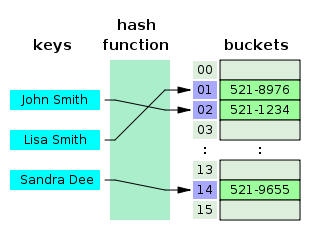

Each entry in the array/vector is called as *an bucket*

The hash function is **djb2** hash function.

In [20]:
def hash_djb2(s):
    hash = 5381
    for x in s:
        hash = ((( hash << 5) + hash) + ord(x)) & 0xFFFFFFFF
    return hash

In [21]:
hash_djb2('hello')

261238937

In [81]:
class _Node(object):
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next_node = None

    def __str__(self):
        return "'{}': '{}'".format(self.key, self.value)


# a simple hashing algorithm with acceptable collision rate
def _djb2x_hash(string):
    hash = 5381
    byte_array = string.encode('utf-8')

    for byte in byte_array:
        # the modulus keeps it 32-bit, python ints don't overflow
        hash = ((hash * 33) ^ byte) % 0x100000000

    return hash

In [109]:
class HashTable(object):
    def __init__(self, capacity):
        self.bucket_array = [None for i in range(capacity)]
        self.capacity = capacity

    def insert(self, key, value):
        key_hash = _djb2x_hash(key)
        bucket_index = key_hash % self.capacity

        new_node = _Node(key, value)
        existing_node = self.bucket_array[bucket_index]

        if existing_node:
            last_node = None
            while existing_node:
                if existing_node.key == key:
                    # found existing key, replace value
                    existing_node.value = value
                    return
                last_node = existing_node
                existing_node = existing_node.next_node
            # if we get this far, we didn't find an existing key
            # so just append the new node to the end of the bucket
            last_node.next_node = new_node
        else:
            self.bucket_array[bucket_index] = new_node

    def lookup(self, key):
        key_hash = _djb2x_hash(key)
        bucket_index = key_hash % self.capacity

        existing_node = self.bucket_array[bucket_index]
        if existing_node:
            while existing_node:
                if existing_node.key == key:
                    return existing_node.value
                existing_node = existing_node.next_node

        return None

    def delete(self, key):
        key_hash = _djb2x_hash(key)
        bucket_index = key_hash % self.capacity

        existing_node = self.bucket_array[bucket_index]
        if existing_node:
            last_node = None
            while existing_node:
                if existing_node.key == key:
                    if last_node:
                        last_node.next_node = existing_node.next_node
                    else:
                        self.bucket_array[bucket_index] = existing_node.next_node
                last_node = existing_node
                existing_node = existing_node.next_node

    def debug_print(self):
        for i in range(self.capacity):
            node = self.bucket_array[i]
            print('Bucket {}'.format(i))
            if node:
                while node:
                    print('    {}'.format(node))
                    node = node.next_node
            else:
                print('    Empty')

Build a sample hash table to store 5000 words in the dictionary from position 10000 to position 15000 with its corresponding inversed index.

In [138]:
hash_table = HashTable(100)
for i in range(10000, 15000):
    hash_table.insert(keys[i].item(),values[i])

In [139]:
hash_table.debug_print()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
    'enterprises': '['6' list([155, 296, 321, 337, 468, 678])]'
    'ersoy': '['1' list([97])]'
    'escapes': '['2' list([257, 702])]'
    'essential': '['37'
 list([21, 64, 123, 192, 196, 277, 308, 361, 468, 485, 487, 530, 543, 552, 553, 576, 581, 594, 652, 711, 713, 775, 802, 837, 841, 857, 860, 861, 865, 869, 871, 935, 947, 960, 973, 989, 999])]'
Bucket 12
    'concurs': '['1' list([890])]'
    'conducted': '['42'
 list([92, 114, 157, 185, 204, 211, 277, 290, 293, 296, 306, 310, 319, 339, 356, 374, 377, 385, 394, 400, 469, 491, 509, 520, 532, 536, 557, 558, 624, 644, 655, 662, 683, 750, 772, 780, 798, 816, 817, 820, 822, 928])]'
    'conflicts': '['12' list([95, 356, 419, 511, 591, 633, 665, 822, 879, 925, 946, 974])]'
    'cookingcarenytimescom': '['5' list([128, 338, 418, 706, 980])]'
    'crank': '['1' list([393])]'
    'cried': '['10' list([165, 216, 234, 566, 591, 647, 720, 726, 932, 999])]'
    'dabney': '['1' list([230

In [146]:
hash_table.lookup('daca')

array(['1', list([720])], dtype=object)

## **Reference**
[1] https://brilliant.org/wiki/hash-tables/